In [46]:
import pandas as pd
# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
#load data set
df = pd.read_csv("KAG_conversion_data.csv")

In [48]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [50]:
#dummy encoding categorical data
pd.get_dummies(df.gender, drop_first=True)
df["gender"] = pd.get_dummies(df.gender, drop_first=True)

In [51]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,1,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,1,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,1,20,693,0,0.00,1,0
3,708815,916,103928,30-34,1,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,1,28,4133,1,1.29,1,1


In [52]:
#saving new dataframe to VariableX
variablex = df

In [53]:
variablex.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,1,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,1,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,1,20,693,0,0.00,1,0
3,708815,916,103928,30-34,1,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,1,28,4133,1,1.29,1,1


***Using a heat map to show the correlation in the data***

<AxesSubplot:>

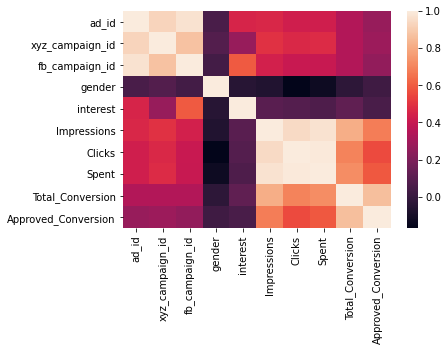

In [54]:
corrMatrix = variablex.corr()
sns.heatmap(corrMatrix)

In [55]:
#Dropping the first 4 columns

In [56]:
variablex.drop(['ad_id', 'xyz_campaign_id','fb_campaign_id','age'], axis='columns', inplace=True)

In [57]:
variablex.head()

,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1,15,7350,1,1.43,2,1
1,1,16,17861,2,1.82,2,0
2,1,20,693,0,0.00,1,0
3,1,28,4259,1,1.25,1,0
4,1,28,4133,1,1.29,1,1


In [ ]:
#clsutering by elbow method

In [62]:
from sklearn.cluster import KMeans

In [ ]:
#best number of cluster

In [64]:
#k = 7
km = KMeans(n_clusters=7)

In [66]:
xfeatures = variablex[['gender','interest','Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']]

In [67]:

# Fit n Predict
clusters = km.fit_predict(xfeatures)

In [68]:
# Get all the Labels(Clusters)
km.labels_

array([5, 5, 5, ..., 1, 0, 4])

In [69]:
clusters

array([5, 5, 5, ..., 1, 0, 4])

In [70]:
# Check if predicted clusters is the same as our labels
clusters is km.labels_

True

In [71]:
# Centroid/Center
km.cluster_centers_

array([[2.71186441e-01, 3.97796610e+01, 6.67437305e+05, 1.26440678e+02,
        1.89834746e+02, 7.84745763e+00, 2.32203390e+00],
       [5.70833333e-01, 3.91166667e+01, 1.66276421e+05, 2.91250000e+01,
        4.48926250e+01, 2.51666667e+00, 8.12500000e-01],
       [7.50000000e-01, 1.85000000e+01, 2.41054375e+06, 3.29000000e+02,
        5.53945001e+02, 3.85000000e+01, 1.45000000e+01],
       [5.38461538e-01, 3.08461538e+01, 1.38397677e+06, 2.31384615e+02,
        3.69176923e+02, 1.53076923e+01, 5.46153846e+00],
       [5.57522124e-01, 4.06725664e+01, 3.87216575e+05, 6.81592920e+01,
        1.07075310e+02, 4.17699115e+00, 1.36283186e+00],
       [5.24812030e-01, 2.82421053e+01, 2.00626932e+04, 3.61954887e+00,
        5.32816542e+00, 1.16992481e+00, 4.21052632e-01],
       [3.46938776e-01, 3.80612245e+01, 1.00854386e+06, 1.89428571e+02,
        2.87202652e+02, 1.21224490e+01, 3.75510204e+00]])

In [72]:
# Store and Map
variablex['gender','interest','Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion'] = clusters
df.head()

,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,"(gender, interest, Impressions, Clicks, Spent, Total_Conversion, Approved_Conversion)"
0,1,15,7350,1,1.43,2,1,5
1,1,16,17861,2,1.82,2,0,5
2,1,20,693,0,0.00,1,0,5
3,1,28,4259,1,1.25,1,0,5
4,1,28,4133,1,1.29,1,1,5


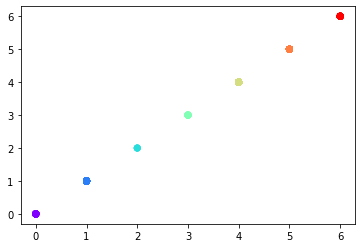

In [81]:
# Plot of our clusters
# Store and Map
# Store and Map
plt.scatter(df['gender','interest','Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion'],df['gender','interest','Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion'],c=df['gender','interest','Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion'],cmap='rainbow')